### This is Fertilizer Prediction Model


In [1]:
#Name : Anjani Kumar
#Role : Data Scientist

### Import required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)


In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


Using TensorFlow backend.


### Load Data

In [4]:
data=pd.read_excel('Fertilizer_Prediction.xlsx',skiprows=1)

In [5]:
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


# Exploratory Data Analysis

In [6]:
#Describe Data for Count/Mean/Median/Mode/Standard Deviation/IQR
data.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [7]:
#Check Datatypes
data.dtypes

Temparature         int64
Humidity            int64
Moisture            int64
Soil Type          object
Crop Type          object
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object

In [8]:
#Check for Null Values in each feature
data.isnull().sum().sort_values(ascending = False)

Fertilizer Name    0
Phosphorous        0
Potassium          0
Nitrogen           0
Crop Type          0
Soil Type          0
Moisture           0
Humidity           0
Temparature        0
dtype: int64

### Outlier Detection

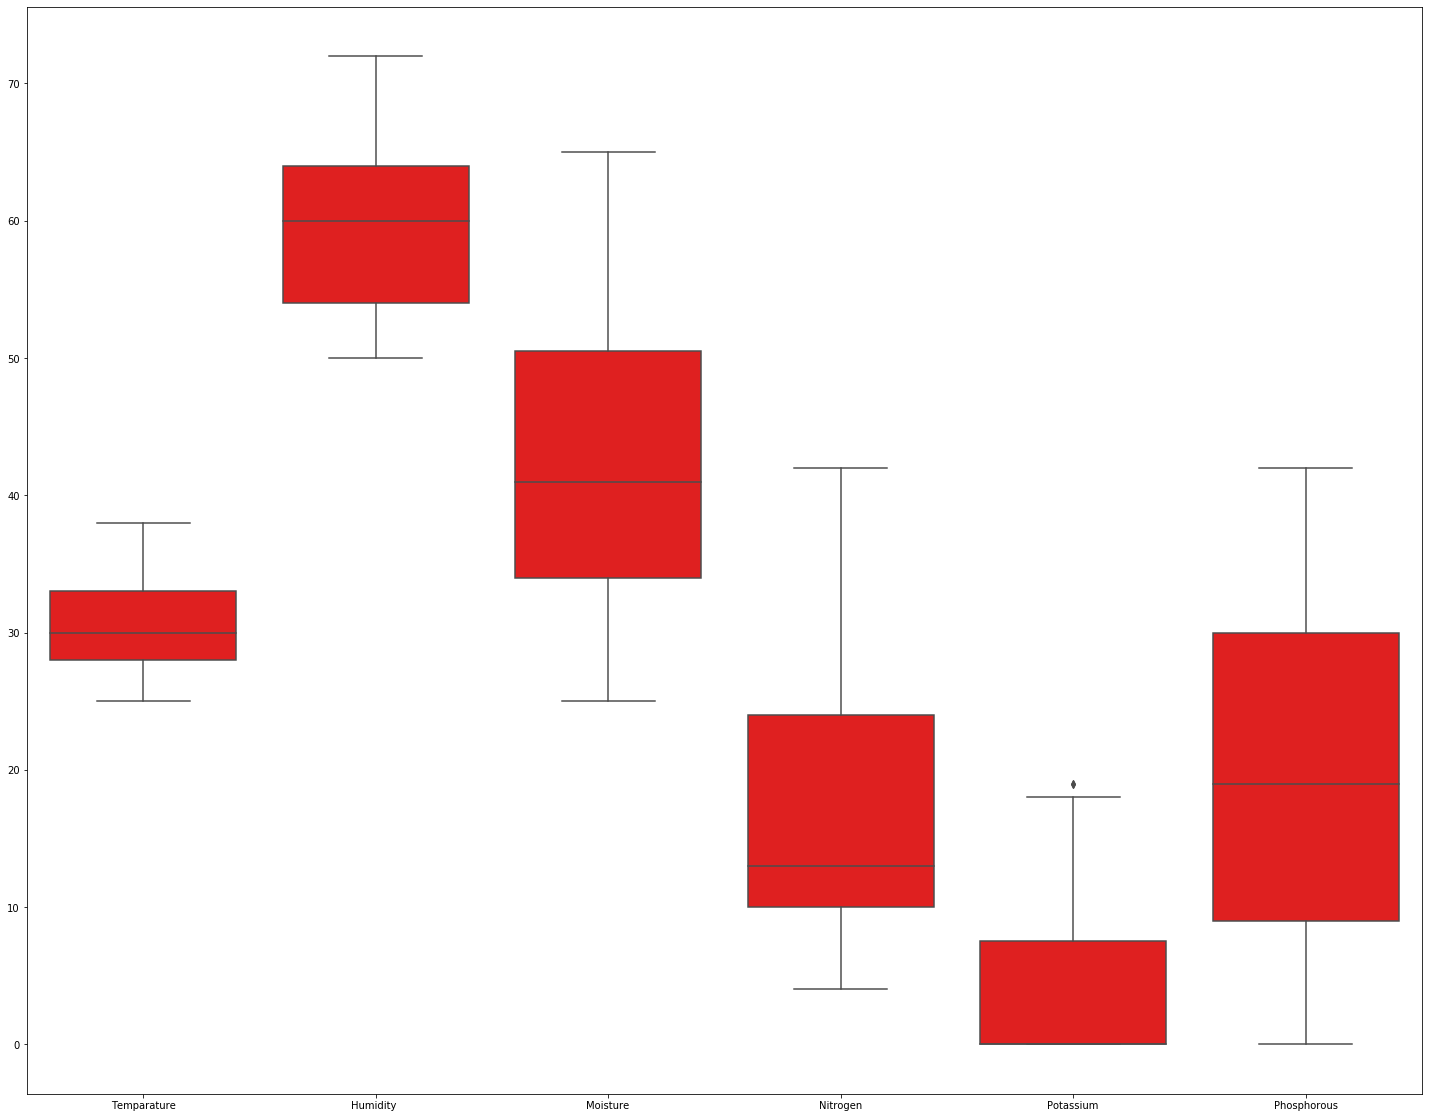

In [9]:
plt.figure(figsize=(25,20))
bplot = sns.boxplot( data=data, 
                      color='red')
bplot
plt.show()

### Outlier Removal

In [10]:
from pandas.api.types import is_numeric_dtype
def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) 
               & (df[name] < quant_df.loc[high, name])]
            return df
    #remove_outlier(df).head()

In [11]:
data=remove_outlier(data)

In [12]:
data.count()

Temparature        82
Humidity           82
Moisture           82
Soil Type          82
Crop Type          82
Nitrogen           82
Potassium          82
Phosphorous        82
Fertilizer Name    82
dtype: int64

### Independent Features used for Prediction

In [13]:
data_X=data.iloc[:,:-1]

In [14]:
data_X.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,26,52,38,Sandy,Maize,37,0,0
1,29,52,45,Loamy,Sugarcane,12,0,36
2,34,65,62,Black,Cotton,7,9,30
3,32,62,34,Red,Tobacco,22,0,20
4,28,54,46,Clayey,Paddy,35,0,0


### Dependent Feature

In [15]:
data_y=data.iloc[:,-1]

In [16]:
data_y.head()

0        Urea
1         DAP
2    14-35-14
3       28-28
4        Urea
Name: Fertilizer Name, dtype: object

In [17]:
#Shape of Independent features
data_X.shape

(82, 8)

In [18]:
#Shape of Dependent features
data_y.shape

(82,)

### Convert Categorical Variable 'Soil Type' and 'Crop Type' to Numeric

In [19]:
data_X=pd.get_dummies(data_X,columns=['Soil Type'])

In [20]:
data_X=pd.get_dummies(data_X,columns=['Crop Type'])

In [21]:
data_X.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium',
       'Phosphorous', 'Soil Type_Black', 'Soil Type_Clayey', 'Soil Type_Loamy',
       'Soil Type_Red', 'Soil Type_Sandy', 'Crop Type_Barley',
       'Crop Type_Cotton', 'Crop Type_Ground Nuts', 'Crop Type_Maize',
       'Crop Type_Millets', 'Crop Type_Oil seeds', 'Crop Type_Paddy',
       'Crop Type_Pulses', 'Crop Type_Sugarcane', 'Crop Type_Tobacco',
       'Crop Type_Wheat'],
      dtype='object')

### Label Encoder to encode Target Variable

In [22]:
#data_y.unique() 

In [23]:
# lst=[]
# encode_val={'Urea':1,'DAP':2,'14-35-14':3,'28-28':4,'17-17-17':5,'20-20':6,'10-26-26':7}
# def label_enc(data):
#     for val in data:
#         if val in encode_val.keys():
#             lst.append(encode_val[val])
# label_enc(data_y)

In [24]:
# data_y=pd.DataFrame(lst,columns=['Fertilizer_Name'])

In [25]:
# data_y.head()

In [26]:
le=LabelEncoder()

In [27]:
data_y=le.fit_transform(data_y)

In [28]:
data_y=pd.DataFrame(data_y,columns=['Fertilizer_Name'])

In [29]:
data_y.head()

,Fertilizer_Name
0,6
1,5
2,1
3,4
4,6


In [30]:
data_y.nunique()

Fertilizer_Name    7
dtype: int64

In [31]:
data_y.groupby(by='Fertilizer_Name').count()

""
Fertilizer_Name
0
1
2
3
4
5
6


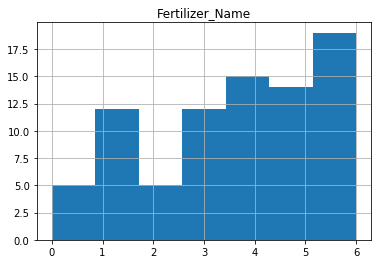

In [32]:
data_y.hist(bins=7)
plt.show()

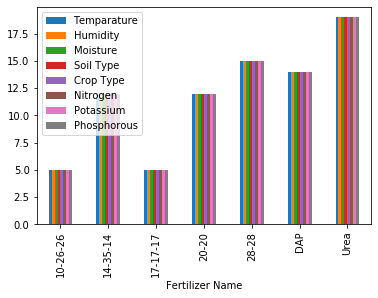

In [33]:
data.groupby('Fertilizer Name').count().plot.bar()
plt.show()

### Create Correlation DataFrame

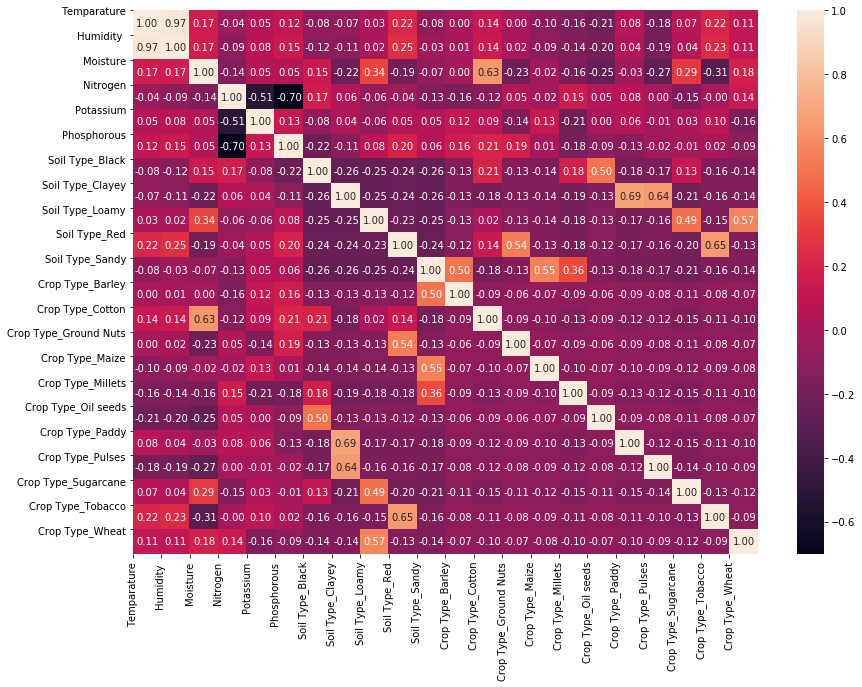

In [34]:
corr=data_X.corr()
#Plot figsize
fig,ax=plt.subplots(figsize=(14,10))

 #Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr,annot=True,fmt=".2f")    

#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

### Identify Highly Correlated 

In [35]:
# Create correlation matrix
corr_matrix = data_X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)

['Humidity ']


# Feature Engineering/Feature Selection

### Drop Highly Correlated Features

In [36]:
data_X.drop(['Humidity '],axis=1,inplace=True)

In [37]:
data_X.head()

,Temparature,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,Soil Type_Sandy,...,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
0,26,38,37,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,29,45,12,0,36,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,34,62,7,9,30,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,32,34,22,0,20,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,28,46,35,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Rechecking if there exists any correlation between features

In [38]:
# Create correlation matrix
corr_matrix = data_X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)

[]


### Convert to Standard Scaler

In [39]:
ss=StandardScaler()

In [40]:
data_X=ss.fit_transform(data_X)

In [41]:
data_X

array([[-1.47397217, -0.44087641,  1.52466092, ..., -0.41403934,
        -0.30550505, -0.28097574],
       [-0.35828862,  0.18863369, -0.61906671, ...,  2.41522946,
        -0.30550505, -0.28097574],
       [ 1.50118396,  1.71744394, -1.04781223, ..., -0.41403934,
        -0.30550505, -0.28097574],
       ...,
       [-0.73018313, -1.6099666 , -0.87631402, ..., -0.41403934,
        -0.30550505, -0.28097574],
       [ 0.0136059 , -1.43010657, -1.30505955, ..., -0.41403934,
         3.27326835, -0.28097574],
       [-0.35828862,  1.26779386, -0.61906671, ...,  2.41522946,
        -0.30550505, -0.28097574]])

In [42]:
#data_y=ss.fit_transform(data_y)

In [43]:
#data_y

### Train_Test_Split

In [44]:
X_train,X_test,y_train,y_test=train_test_split(data_X, data_y,test_size=0.20,random_state=20)

# Model Selection - Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lr=LogisticRegression()

In [47]:
lr.fit(X_train,y_train)

C:\Users\akumar4\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
y_pred_lr=lr.predict(X_test)

In [49]:
cm=confusion_matrix(y_test,y_pred_lr)

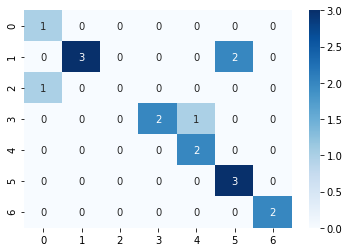

In [50]:
sns.heatmap(cm,annot=True,fmt='.4g',cmap='Blues')
plt.show()

In [51]:
acl=accuracy_score(y_test,y_pred_lr)

In [52]:
print('Accuracy Score {} :'.format(acl))

Accuracy Score 0.7647058823529411 :


In [53]:
prec=precision_score(y_test,y_pred_lr,average='micro')
print('Precision Score {} :'.format(prec))

Precision Score 0.7647058823529411 :


In [54]:
recall=recall_score(y_test,y_pred_lr,average='micro')
print('Recall Score {}:'.format(recall))

Recall Score 0.7647058823529411:


In [55]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(lr,data_X, data_y,cv=10)

C:\Users\akumar4\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\akumar4\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\akumar4\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\akumar4\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d arr

In [56]:
cvs.mean()

0.7611111111111111

### Save Linear Regression Model

In [57]:
pickle.dump(lr,open('Fertlizer_Predict_LR.pkl','wb'))

In [58]:
model=pickle.load(open('Fertlizer_Predict_LR.pkl','rb'))

# Model Selection -Support Vector Classifier

In [59]:
from sklearn.svm import SVC

In [60]:
svm=SVC()

In [61]:
svm.fit(X_train,y_train)

C:\Users\akumar4\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
y_pred_svm=svm.predict(X_test)

In [63]:
cm=confusion_matrix(y_test,y_pred_svm)
cm

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 3, 2, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 2, 0, 0],
       [0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 1, 2, 0],
       [0, 0, 0, 0, 1, 0, 1]], dtype=int64)

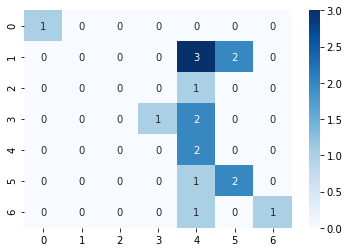

In [64]:
sns.heatmap(cm,annot=True,fmt='.4g',cmap='Blues')
plt.show()

In [65]:
acsvm=accuracy_score(y_test,y_pred_svm)


In [66]:
print('Accuracy Score {}:'.format(acsvm))

Accuracy Score 0.4117647058823529:


In [67]:
prec=precision_score(y_test,y_pred_svm,average='micro')
print('Precision Score {}:'.format(prec))

Precision Score 0.4117647058823529:


In [68]:
recall=recall_score(y_test,y_pred_svm,average='micro')
print('Recall Score {}:'.format(recall))

Recall Score 0.4117647058823529:


### Using ANN - Deep Learning

### Initialize classifier

In [69]:
classifier=Sequential()

### Add first input layer and first hidden layer

In [70]:
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=21))

### Mid Layer

In [71]:
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

### Output Layer

In [72]:
classifier.add(Dense(units=7,kernel_initializer='glorot_uniform',activation='softmax'))

In [73]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [74]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 132       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 49        
Total params: 223
Trainable params: 223
Non-trainable params: 0
_________________________________________________________________


In [75]:
model_history=classifier.fit(X_train,y_train,validation_split=0.10,batch_size=5,epochs=200)


Train on 58 samples, validate on 7 samples
Epoch 1/200
58/58 [==============================] - 0s 1ms/step - loss: 2.2380 - accuracy: 0.1379 - val_loss: 2.1940 - val_accuracy: 0.0000e+00
Epoch 2/200
58/58 [==============================] - 0s 190us/step - loss: 2.1902 - accuracy: 0.1379 - val_loss: 2.1532 - val_accuracy: 0.0000e+00
Epoch 3/200
58/58 [==============================] - 0s 190us/step - loss: 2.1527 - accuracy: 0.1379 - val_loss: 2.1230 - val_accuracy: 0.0000e+00
Epoch 4/200
58/58 [==============================] - 0s 172us/step - loss: 2.1231 - accuracy: 0.1552 - val_loss: 2.0958 - val_accuracy: 0.0000e+00
Epoch 5/200
58/58 [==============================] - 0s 198us/step - loss: 2.0968 - accuracy: 0.1552 - val_loss: 2.0689 - val_accuracy: 0.0000e+00
Epoch 6/200
58/58 [==============================] - 0s 178us/step - loss: 2.0734 - accuracy: 0.1552 - val_loss: 2.0510 - val_accuracy: 0.0000e+00
Epoch 7/200
58/58 [==============================] - 0s 190us/step - loss: 2.

In [76]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


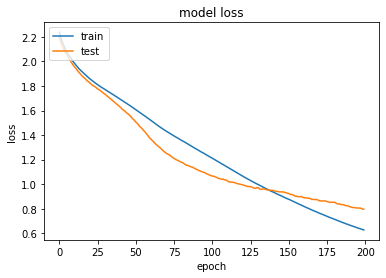

In [77]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Save ANN Model

In [78]:

pickle.dump(classifier,open('Fertlizer_Predict_ANN.pkl','wb'))

In [79]:
model=pickle.load(open('Fertlizer_Predict_ANN.pkl','rb'))